# Data
Let's start by generating some training data. We simulate the data from a unit normal distribution, whose PDF takes the form $$\varphi(z) = \frac{e^{-z^2/2}}{\sqrt{2\pi}}.$$

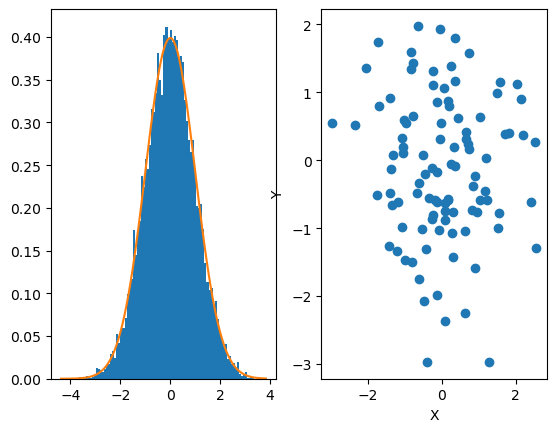

In [136]:
import numpy as np
from matplotlib import pyplot as plt

stdNDensity = lambda x : (1/(np.sqrt(2 * np.pi))) * np.exp(0.5 * -(x ** 2) )
stdN = np.random.standard_normal(10000) # input vector

# sample from the distribution to generate the training set (X,Y)
X = np.random.choice(stdN, 1001)
Y = np.random.choice(stdN, 1000)
X[0] = 1

# plot the distribution with its density
plt.subplot(1,2,1)
count, bins, ignored = plt.hist(stdN, 100, density=True)
plt.plot(bins, stdNDensity(bins))

# plot the training data
plt.subplot(1,2,2)
plt.scatter(X[1:101],Y[:100])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Fitting the Output
Hence, we have a training set $(X,Y)$. Now, we seek to fit the data with a simple least-squares regression. In other words, a single output $\hat{Y}$ takes the form $$\hat{Y} = \hat\beta_{0} + \sum_{j = 1}^{\mathcal N}X_{j}\hat \beta_{j} \qquad \mathcal N = \dim X,$$ as it would for any linear model. And, if we include $1$ in the input vector $X$, we may express the above sum as an inner product: $$ \hat Y = X^T \hat \beta. $$

## Least Squares
The *least squares* aspect of our linear fit comes from our choice of $\hat\beta$ as the minimum of the *residual sum of squares*: $$ \operatorname{RSS}(\beta) = \sum_{i = 1}^{\mathcal N}(Y_i - X^T_i \beta)^2. $$ Now, differentiating with respect to $\beta$ yields the **normal equations**: $$ X^T (Y - X \beta) = 0, $$ which beget the unique solution $$\beta = (X^T X)^{-1} X^TY.$$

In [137]:
beta = (np.inner(X.T, X) ** -1) * np.inner(X[1:].T, Y)
euclid_dist = lambda xi, yi : np.abs(yi - xi * beta)

temp = X[1:]
errors = np.array([euclid_dist(temp[i], Y[i]) for i in range(len(temp))])

print("beta:", beta)

beta: 0.04224040254951167


So, now for an arbitrary input $x_i$, we have an estimate $\hat y_{j} = \hat{y}(x_j) = x^T_j \cdot \beta$. Thus, we end up with a fitted variable $\hat G = \begin{bmatrix} y_0 & y_1 \cdots & y_{\mathcal N} \end{bmatrix}^T.$

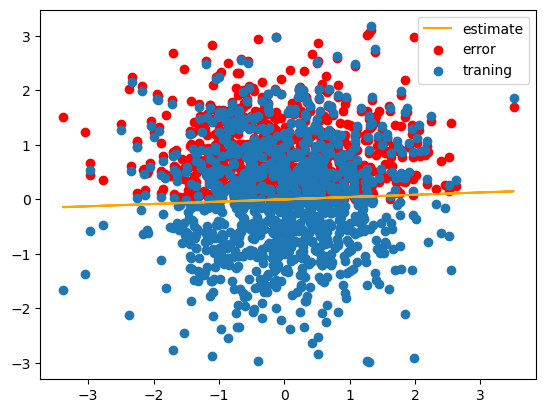

In [138]:
y_j = lambda xj : xj * beta
G_hat = [y_j(x) for x in X[1:]]

plt.plot(X[1:], G_hat, label="estimate", color="orange")
plt.scatter(X[1:], errors, label="error", color="red")
plt.scatter(X[1:], Y, label="traning")
plt.legend()
plt.show()


# Generalizing the Method
Now, we generalize the previous code in an effort to look at the model's behavior under different probability distributions. In an effort to do so, this function takes a distribution and the number of samples to construct the training set, then performs a least squares regression on the training set. As before, the samples are chosen from the distribution randomly (i.e. uniformly).

In [206]:
# samples a certain number of datapoints from a given distribution
sample_dist = lambda distr, count : np.random.choice(distr, count)

def leastSquaresRegression(distribution, samples, should_plot=False):
    X, Y = sample_dist(distribution, samples + 1), sample_dist(distribution, samples)
    X1 = X[1:]
    
    beta = (np.inner(X.T, X) ** -1) * np.inner(X1.T, Y)
    euclid_dist = lambda xi, yi : np.abs(yi - xi * beta)
    errors = np.array([euclid_dist(X1[i], Y[i]) for i in range(len(X1))])

    y_j = lambda xj : xj * beta
    G_hat = [y_j(x) for x in X[1:]]

    print("Mean Error:", np.mean(errors), " | ", "Beta:", beta)
    if should_plot:
        plt.plot(X1, G_hat, label="estimate", color="orange")
        plt.scatter(X1, errors, label="error", color="red")
        plt.scatter(X1, Y, label="traning")
        plt.legend()
        plt.show()

# Beta Distribution


Mean Error: 0.2585733479146361  |  Beta: 0.9137078046039768


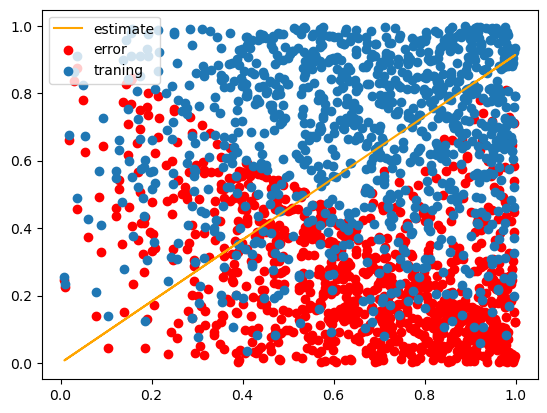

In [207]:
leastSquaresRegression(np.random.beta(2, 1, 10000), 1000, True)